In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_survey=pd.read_csv('https://cocl.us/datascience_survey_data')
print('Data downloaded and read into a dataframe!')
headers=['Topics','Very interested','Somewhat interested','Not interested']
df_survey.columns=headers
df_survey.set_index('Topics',inplace=True)
df_survey.index.name=None
df_survey.sort_values(by='Very interested',ascending=False,axis=0,inplace=True)
df_survey['Total']=df_survey.sum(axis=1)
df_survey

Data downloaded and read into a dataframe!


,Very interested,Somewhat interested,Not interested,Total
Data Analysis / Statistics,1688,444,60,2192
Machine Learning,1629,477,74,2180
Data Visualization,1340,734,102,2176
Big Data (Spark / Hadoop),1332,729,127,2188
Deep Learning,1263,770,136,2169
Data Journalism,429,1081,610,2120


In [3]:
GrandTotal=df_survey['Total'].sum()
GrandTotal

13025

In [4]:
df_survey['Very interested']=round(((df_survey['Very interested']/GrandTotal)*100),2)
df_survey['Somewhat interested']=round(((df_survey['Somewhat interested']/GrandTotal)*100),2)
df_survey['Not interested']=round(((df_survey['Not interested']/GrandTotal)*100),2)
#df_surveyPer=df_survey['Very interested','Somewhat interested','Not interested']
maincols=['Very interested','Somewhat interested','Not interested']
df_survey=df_survey[maincols]
df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,12.96,3.41,0.46
Machine Learning,12.51,3.66,0.57
Data Visualization,10.29,5.64,0.78
Big Data (Spark / Hadoop),10.23,5.60,0.98
Deep Learning,9.70,5.91,1.04
Data Journalism,3.29,8.30,4.68


<Figure size 432x288 with 0 Axes>

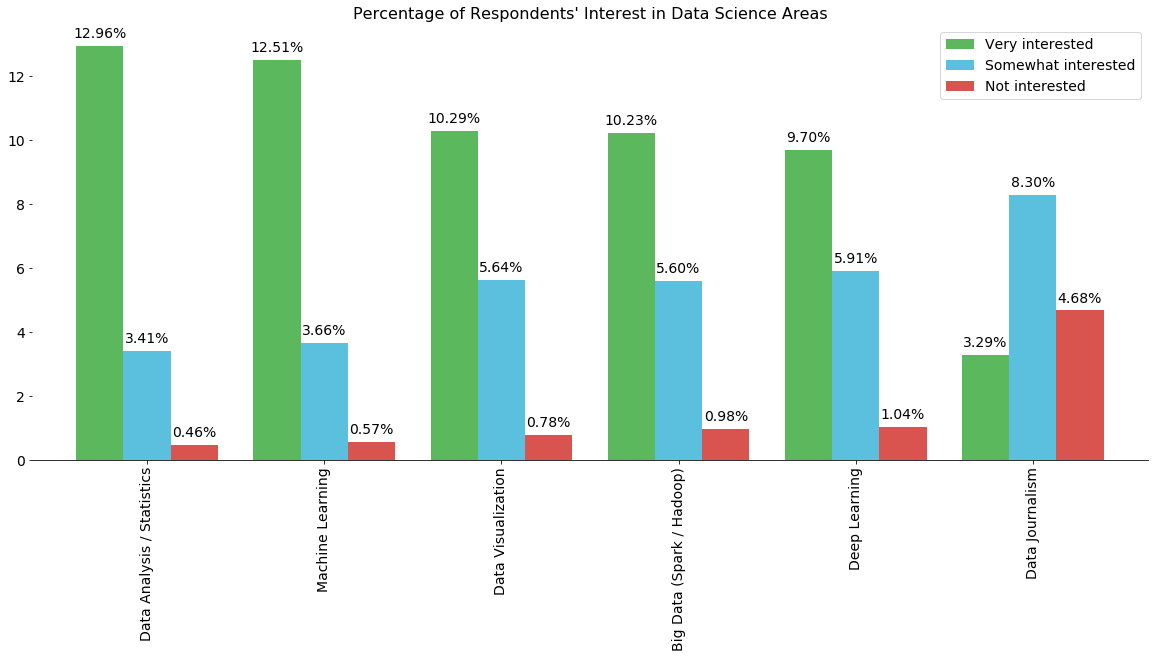

In [11]:
# Plot the figure.
plt.figure()
color1=['#5cb85c','#5bc0de','#d9534f']
ax = df_survey.plot(kind='bar',color=color1,width=0.8,figsize=(20, 8),fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas",fontsize=16)
ax.legend(fontsize=14,facecolor='white')
ax.set_facecolor('white')
#removing top, left and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.grid(color='white', linestyle='')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}".format(y_value)+'%'

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va,
    fontsize=14)                      # Vertically align label differently for
                                    # positive and negative values.

plt.savefig("image.png")
